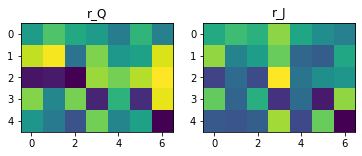

In [1]:
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt

n = 5  # dimension of player Q's actions
m = 7  # dimension of player J's actions
d = 10 # number of elements in state space
h=.6   # mixing parameter to help game from being degenerate

np.random.seed(0)
r_Q = np.random.uniform(size =(n,m))
r_J = h*r_Q +(1-h)*(-1+2*np.random.uniform(size=(n,m)))

delta = .9
gamma = .8

P = np.random.uniform(size=(d,d,n,m))

plt.subplot(1, 2, 1) 
plt.imshow(r_Q)
plt.title('r_Q')
plt.subplot(1, 2, 2)
plt.imshow(r_J)
plt.title('r_J')
plt.show()

In [2]:
Q = np.random.uniform(size =(d,n,m))
J = np.random.uniform(size =(d,n,m))
Qnew = np.copy(Q)
Jnew = np.copy(J)

T = 1000
learn_incr = 100
s = np.zeros(T)
s[0] = np.random.choice(np.arange(0,d))
err = np.zeros((T,2))

w = np.random.choice(np.arange(0,n))
a = np.random.choice(np.arange(0,m))

for t in range(T-1):
    ## learning rate
    alpha = 1/(1 + int(t/learn_incr))
    
    ## update the state
    s0 = s[t].astype(int)
    s[t+1] = np.random.choice(np.arange(0,d),p = P[s0,:,w,a]/np.sum(P[s0,:,w,a]))
    s_prime = s[t+1].astype(int)
    
    ## use Lemke-Howson to find Nash equlibria
    random_game = nash.Game(Q[s_prime ],J[s_prime ])
    equilibria = random_game.lemke_howson_enumeration()
    
    ## randomly select a Nash point
    eq_list = [eq for eq in equilibria]
    eq_list_nonan = [eq for eq in eq_list if np.sum(np.isnan(eq[0]))+np.sum(np.isnan(eq[1]))==0]
    eq_list_non_neg = [eq for eq in eq_list_nonan if min(np.append(eq[0],eq[1]))>=0]
    ind = np.random.choice(np.arange(0,len(eq_list_non_neg)))
    eq_rand = eq_list_non_neg[ind]
    
    ## use the Hu & Wellman update scheme
    Qnew[s0,w,a]=(1-alpha)*Q[s0,w,a] + alpha*(r_Q[w,a] + gamma* eq_rand[0].T@Q[s_prime ]@eq_rand[1])
    Jnew[s0,w,a]=(1-alpha)*J[s0,w,a] + alpha*(r_J[w,a] + delta* eq_rand[0].T@J[s_prime ]@eq_rand[1])
    
    ## output error and save updated arrays
    err[t,:]=(np.linalg.norm(Qnew-Q),np.linalg.norm(Jnew-J))
    Q[s0,w,a] = Qnew[s0,w,a]   
    J[s0,w,a] = Jnew[s0,w,a]
          
    ## randomly select action going forward
    w = np.random.choice(np.arange(0,n),p=eq_rand[0])
    a = np.random.choice(np.arange(0,m),p=eq_rand[1])


Text(0.5, 0, 't')

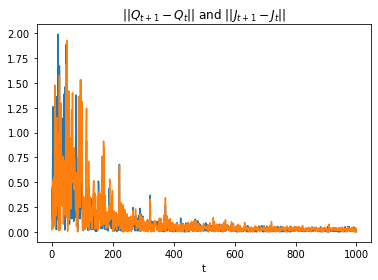

In [3]:
plt.plot(err);
plt.title('$\||Q_{t+1}-Q_{t}\||$ and $\||J_{t+1}-J_{t}\||$')
plt.xlabel('t')

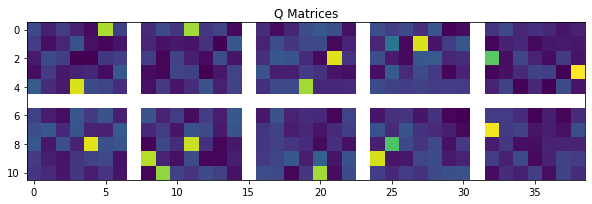

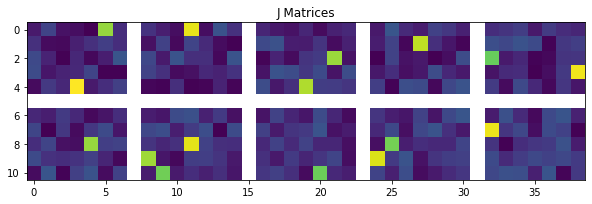

In [4]:
Qall = np.nan*np.zeros((2*(n+1),5*(m+1)))
Jall = np.nan*np.zeros((2*(n+1),5*(m+1)))


for i in range(2):
    for j in range(5):
        Qall[(n+1)*i:((n+1)*i+n),(m+1)*j:((m+1)*j+m)]=Q[5*i+j]
        Jall[(n+1)*i:((n+1)*i+n),(m+1)*j:((m+1)*j+m)]=J[5*i+j]
Qall = Qall[0:-1,0:-1]
Jall = Jall[0:-1,0:-1]
    
plt.figure(figsize=(10,20))
plt.imshow(Qall)
plt.title('Q Matrices')
plt.show()

plt.figure(figsize=(10,20))
plt.imshow(Jall)
plt.title('J Matrices')
plt.show()

